In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import chi2
import os,sys
import seaborn as sns
sns.set_style('whitegrid')

# import helper script file
## change working directory
os.chdir("C:/Users/rokka/GH-repos/GitHubPages/Code-Reference-Notebook/CU-Boulder/AstroPhys/HW")

## import my own code
import hw_helper_func2 as hf  # this is my own code I made (for probability/distribution fucntions, etc.)

# 3. Find the Signal
There have been many cases in which one must identify a signal buried in noise. It is easier than one thinks! LIGO, for example, offers an example in which distinct types of signals are expected. The data plotted below contains a signal embedded in random noise (fabricated). The data are ina  file "`HW5_Data.txt`" (10000 values) and the signal is in the file "`HW5_Signal.txt`" (400 values).

![](Q3_figures.PNG)

## Part (a)
Read in and verify signals. The cadence is 0.1 sec; generate time array for plotting. Let's start with the easiest method: cross-correlate the expected signal (400 points) with the data (1000 points). You will necessarily need to restrict your correlation to start at 20 sec and end at 980 sec to avoid edge effects. Plot the cross correlation as a function of time. Do you see a peak?

In [2]:
# read in data
data = np.loadtxt("hw5/HW5_Data.txt")
print("data shape:", data.shape)
data[:5]

data shape: (2000, 5)


array([[-1.4489671 , -0.05639172,  0.10236344,  0.03012188, -0.31627342],
       [-0.62731206,  1.5052398 ,  1.8104919 ,  0.41340446, -0.79464376],
       [ 0.88138539,  2.349612  , -0.44794255, -1.0353943 ,  0.92682785],
       [-0.07622421, -1.7109563 , -0.72154695,  1.3731886 ,  0.36365283],
       [-1.2074399 ,  0.32280344, -0.80500466,  1.4214896 ,  0.63947892]])

In [3]:
# Flatten 5d data to 1d
data_1d = data.flatten()
print(len(data_1d))
data_1d[:5]

10000


array([-1.4489671 , -0.05639172,  0.10236344,  0.03012188, -0.31627342])

In [4]:
# read in signal data
signal = np.loadtxt("hw5/HW5_Signal.txt")
print("signal data shape:", signal.shape)
signal[:5]

signal data shape: (80, 5)


array([[-6.2465821e-06, -1.3047378e-05, -2.0128356e-05, -2.6956645e-05,
        -3.2930560e-05],
       [-3.7414051e-05, -3.9777609e-05, -3.9443527e-05, -3.5932957e-05,
        -2.8911940e-05],
       [-1.8233456e-05, -3.9726125e-06,  1.3547713e-05,  3.3743037e-05,
         5.5767006e-05],
       [ 7.8525801e-05,  1.0070760e-04,  1.2082675e-04,  1.3728147e-04,
         1.4842331e-04],
       [ 1.5263583e-04,  1.4841952e-04,  1.3447950e-04,  1.0981237e-04,
         7.3788494e-05]])

In [5]:
# Flatten to 1d
signal_1d = signal.flatten()
print(len(signal_1d))
signal_1d[:5]

400


array([-6.2465821e-06, -1.3047378e-05, -2.0128356e-05, -2.6956645e-05,
       -3.2930560e-05])

In [6]:
# TODO: cross correlate (i.e. the rest of Q3 part a)

## Part (b)
Isolate the maximum correlation value ($C_{\text{max}}$) and then calculate the standard deviation ($\sigma_C$) of the 9600 correlation values. Waht is $C_{\text{max}}/\sigma_C$? What is the probability of measuring such a correlation (or greater) given an Gaussian parent distribution?

**Hint:**

\begin{equation*}
P = \frac{1}{2}\left[1 - \text{erf}\left(\frac{C_{\text{max}}}{\sqrt{2}\sigma_C} \right) \right]; \text{ use double precision}
\end{equation*}

## Part (c)

At this point one may think that this event cannot possibly be a random fluctuation. However, how many 0.1 s periods are there in a year? There also are ~$10^4$ different variations in the expected signal. Given that information, how many random events would one expect in a year?

## Part (d)
However, suppose that one made two such measurements (as did LIGO) and that the second data set had a correlation of 4.6 $\sigma_C$ within the expected speed-of-light delay. Given the $2^{\text{nd}}$ detection, what is the probability that these two measurements are from a random fluctuation?

# 4. Convolution Theorem

An older telescope has a horizontal CCD readout blur (see below). Unfortunately, the CCD readout has a memory of the previous pixel that exponentially fades causing horizontal streaks. 

Examine the two images below.

![](Q4_stars_figures.PNG)

## Part (a)
The blurred image is in a text file "`HW5_BlurredImage.txt`", which contains $256 \times 256$-point array ($I_{\text{Blur}}$). Read in this image and plot to verify

In [12]:
# Read BlurredImage text file (using numpy file version from Caroline (I also had issues with original txt file))
I_blur = np.load("hw5/HW5_BlurredImage.npy")
I_blur.shape

(256, 256)

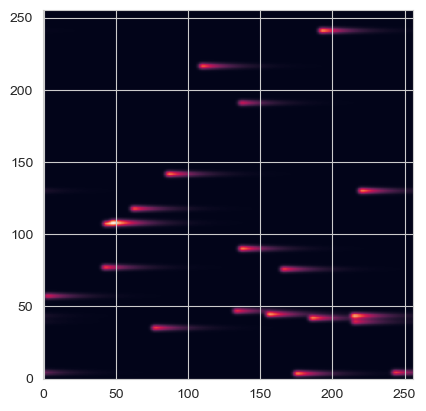

In [10]:
# plot BlurredImage data
plt.imshow(I_blur,origin='lower')

## Part (b)
Fortunately, the transfer function is fairly well known. It is in the text file "`HW5_TransferFunc.txt`", which contains a 256-point array. The transfer function and it's DFT are shown below.

![](Q4_transfer_figures.PNG)

## Part (c)

Read in and perform a DFT on the transfer function, $h(j)$. Plot your results and compare to above (and/or perform a reverse DFT to check). Pixel numbers are positive integers sot that one can calculate:
$$\tilde{h}(n) = \displaystyle \sum_{j=0}^{N-1} h(j) e^{-i2\pi n j/N}$$

```idl
jarr = [0,1,...255], npts=256
for n = 0, npts-1 do h_rl(n) = total(h*cos(jarr*n*2*!dpi/npts)) ; h is 256-point transfer function; total performs a sum
for n = 0, npts-1 do h_im(n) = -total(h*sin(jarr*n*2*!dpi/npts))
```

**Note:** One can use an FFT (with no window) if you prefer, but take care to understand how it works. I recommend doing a reverse FFT to check.

In [15]:
# read in transfer function (using numpy file version from Caroline (I also had issues with original txt file))
transfer = np.load("hw5/HW5_TransferFunc.npy")
transfer.shape

(256,)

## Part (d)

Perform a DFT on the blurred image line by line in $y$. Be careful here. One must perform 256 DFTs; one for each position in $y$. I recommend finding a $y$ value a star and testing your code.

$$\tilde{I}_{\text{Blur}}(n,y)=\displaystyle \sum_{j=0}^{N-1}I_{\text{Blur}}(j,y)e^{-i2\pi n j/N}$$

In [ ]:
#TODO: Perform DFT on Blurred Image

## Part (e) 
Carefully calculate (watch out for signs!) line by line in $y$:

\begin{equation*}
\tilde{I}_{\text{Source}}(n,y) = \frac{\tilde{I}_{\text{Blur}}(n,y)\tilde{h}^*(n)}{|\tilde{h}(n)|^2}
\end{equation*}

## Part (f)

Perform a reverse DFT on $\tilde{I}_{Source}$. Plot your results. The image should be close but not exactly equal to the source image plotted above.

**Hint:** The most common error is in reconstructing $\tilde{I}_{\text{Source}}$. Check your reverse DFT by deriving $h$ from $\tilde{h}$.

In [ ]:
#TODO: Reverse DFT

In [ ]:
#TODO: Plot results